# Guia 2

## Ejercicio 1

Implemente el algorítmo de retropropagación para un perceptrón multicapa de forma que se pueda elegir libremente la cantidad de capas de la red y de neuronas en cada capa. Pruébelo entrenando una red de estructura apropiada para resolver el problema `XOR`, con sus particione de entrenamiento y prueba correspondientes (datos de la Guía de Trabajos Prácticos 1).

### Solucion

Los pasos para ajustar son:
- Prograpar entrada para calcular salida
- Calcular error
- Propagar patras calculando los deltas de cada neurona

Modelacion:
- Modelar cada capa como
    - un vector columna de entradas
    - una matriz de pesos
    - calculará el vector de salidas a partir de un vector de entradas y la matriz de pesos
    - Hay que agregarle noma el peso del bias

Bucle de entrenamiento:
    - forward: multiplicar la matriz de pesos por las entradas, te da la salida, que la usa la siguiente capa, etc. De aca sacamos los vectores de salida de cada capa
    - backward: calcular el delta de cada capa, desde la capa de salida pa'tras. De aca sacamos los vectores delta de cada capa.
    - actualizacion

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import PerceptronMulticapa

def cargarCSV(csvRelativePath, delimeter = ',') -> np.ndarray[any]:
    this_folder = os.path.abspath('') 
    fullPath = os.path.join(this_folder, csvRelativePath)
    return np.loadtxt(fullPath, dtype=float, delimiter=delimeter)

# ===== PARAMETROS =====
max_epocas = 200
target_error = 0.01

# ===== TRAINING =====
# leer archivos
trainFileXOR = cargarCSV('./data/XOR_trn.csv')
x = trainFileXOR[:,:-1]
yd = trainFileXOR[:,-1]

# Definir variantes
η = [0.2, 0.1, 0.05, 0.01]
neuronas = [[1,1], [2,1], [3,1], [1,1,1]]
redes: list[list[PerceptronMulticapa.PerceptronMulticapa]] = [[PerceptronMulticapa.PerceptronMulticapa(
    cant_entradas=x.shape[1],
    capas=neuronas[j],
    max_epocas=max_epocas,
    tasa_aprendizaje=η[i]
) for i in range(len(η))] for j in range(len(neuronas))]

errores = [[redes[j][i].entrenar(x,yd) for i in range(len(η))] for j in range(len(neuronas))]

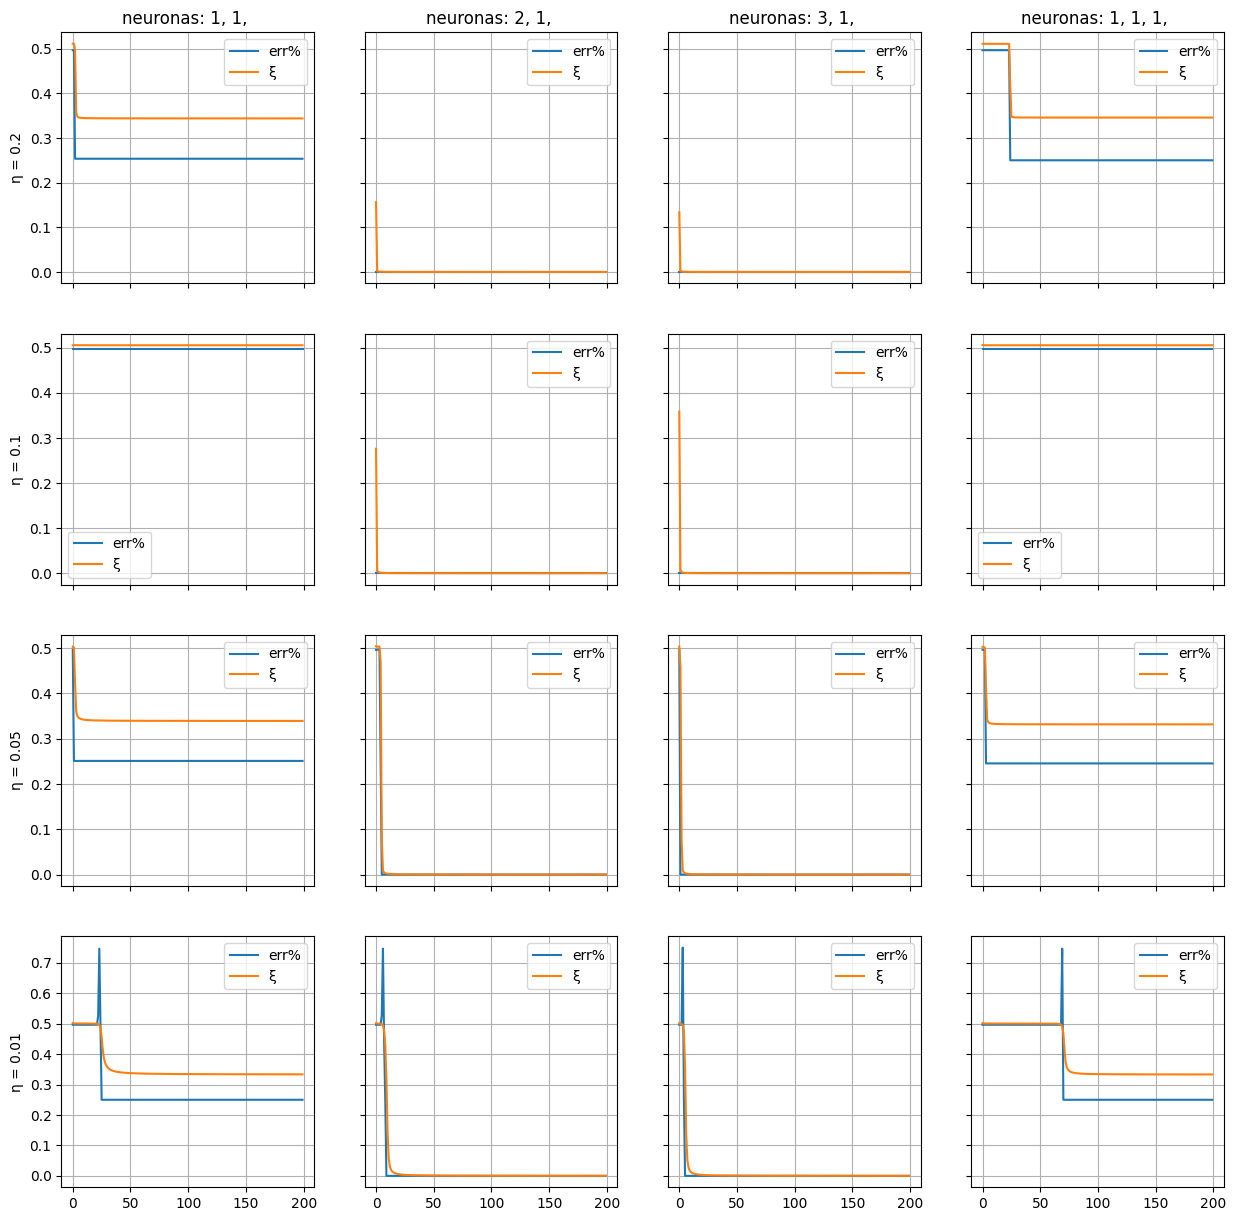

In [ ]:
# Gráficas
fig, ax = plt.subplots(len(η), len(neuronas), sharex="col", sharey="row")
fig.set_figwidth(15)
fig.set_figheight(15)
for j in range(len(neuronas)):
    label = "neuronas: "
    for n in neuronas[j]:
        label += f"{n}, "
    ax[0,j].set_title(label)
    for i in range(len(η)):
        if j == 0:
            ax[i,j].set_ylabel(f"η = {η[i]}")
        ax[i,j].grid()
        ax[i,j].plot(redes[j][i].error_history, label="err%")
        ax[i,j].plot(redes[j][i].quaderror_history, label="ξ")
        ax[i,j].legend()

plt.show()